In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [5]:
#Load Dataset

df = pd.read_csv(r"C:\Users\Malli Mounika\Downloads\Heart_Disease_Prediction.csv")

df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [6]:
#Basic Understanding

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [20]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [21]:
# Check missing values
missing_values = df.isnull().sum()
print(missing_values)

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
target                     0
dtype: int64


In [8]:
df.rename(columns={'Heart Disease': 'target'}, inplace=True)

In [9]:
#Separate Features & Target

X = df.drop('target', axis=1)
y = df['target']

In [10]:
#Train Test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
#Scaling

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#Model Building
# Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9074074074074074


In [16]:
#Random Forest (Advanced Model)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8148148148148148


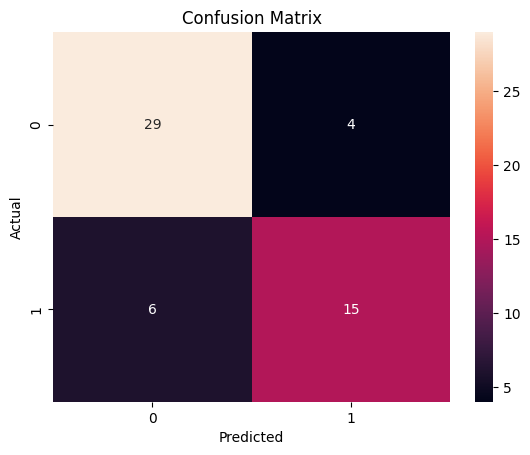

In [17]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

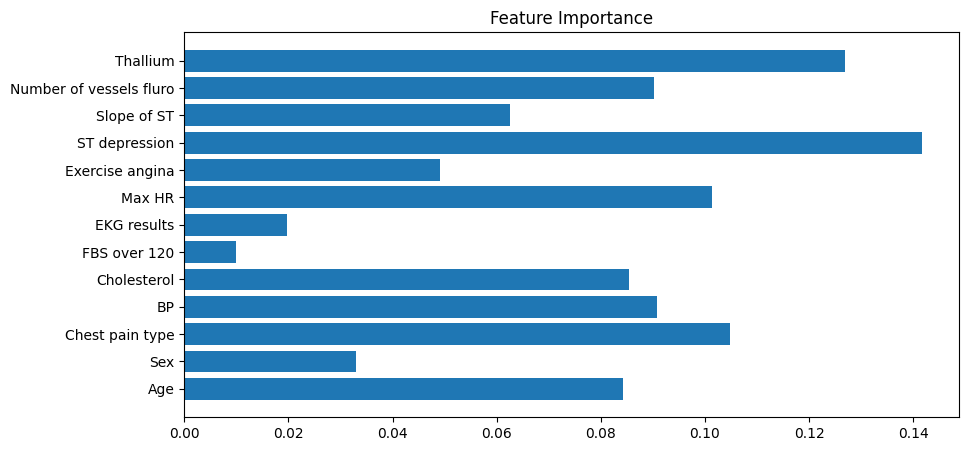

In [18]:
#Feature Importance

importances = rf.feature_importances_

feature_names = df.drop('target', axis=1).columns

plt.figure(figsize=(10,5))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.show()

In [19]:
#Cross Validation

scores = cross_val_score(rf, X, y, cv=5)
print("Cross Validation Accuracy:", scores.mean())

Cross Validation Accuracy: 0.8222222222222222


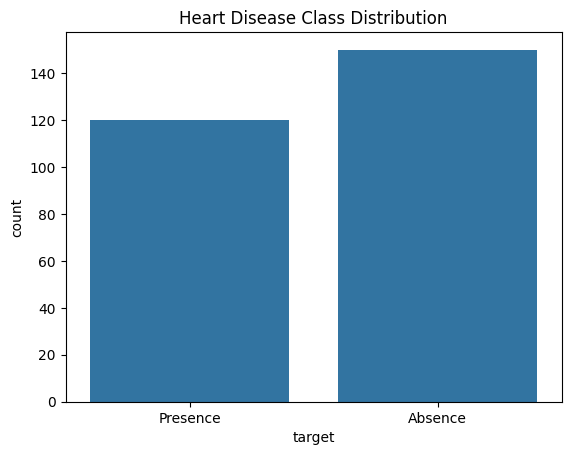

In [22]:
#Class Balance Visualization

sns.countplot(x='target', data=df)
plt.title("Heart Disease Class Distribution")
plt.show()

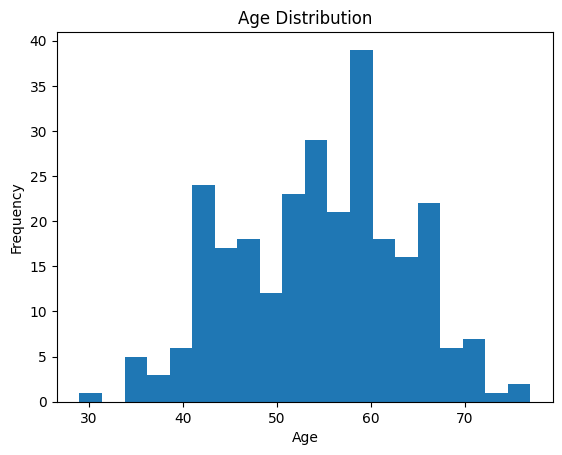

In [26]:
#Age Distribution

plt.hist(df['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

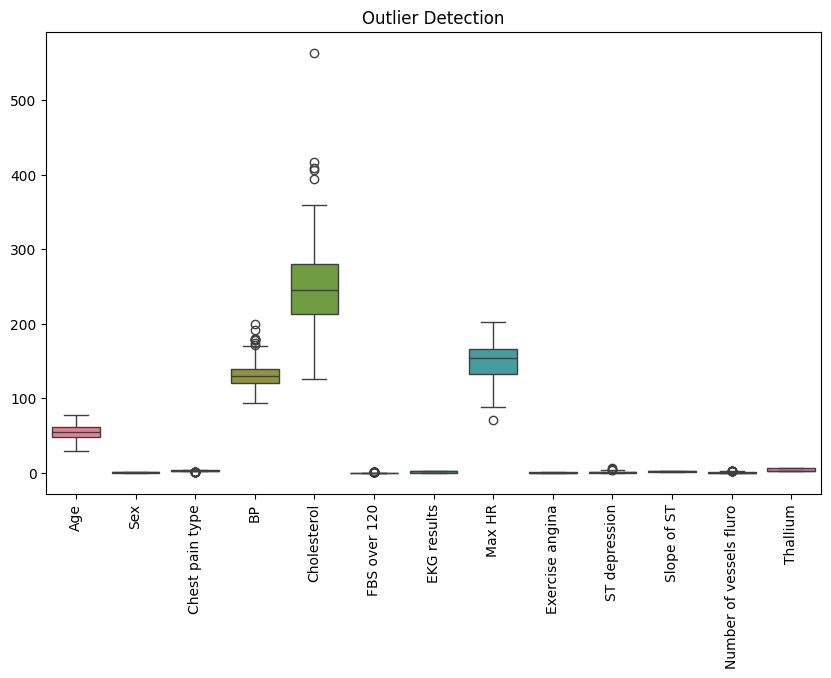

In [28]:
#Outlier Detection 
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

In [30]:
#Prediction on Test Data
y_pred = rf.predict(X_test)

print("Predictions:", y_pred[:10])

Predictions: ['Absence' 'Presence' 'Absence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Absence' 'Absence' 'Absence']


In [31]:
#Compare Actual vs Predicted

results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

results.head(10)

,Actual,Predicted
0,Presence,Absence
1,Presence,Presence
2,Absence,Absence
3,Absence,Absence
4,Absence,Absence
5,Presence,Presence
6,Absence,Presence
7,Absence,Absence
8,Absence,Absence
9,Absence,Absence


In [32]:
#Predict for a NEW Patient 

# Create new patient data
new_patient = pd.DataFrame([[55,1,2,130,250,0,1,150,0,1.2,2,0,2]],
                           columns=X.columns)

# Scale the input (IMPORTANT!)
new_patient_scaled = scaler.transform(new_patient)

# Predict
prediction = rf.predict(new_patient_scaled)

if prediction[0] == 1:
    print("Prediction: Heart Disease Present")
else:
    print("Prediction: No Heart Disease")

Prediction: No Heart Disease


In [33]:
#Prediction Probability 
prob = rf.predict_proba(new_patient_scaled)

print("Probability of No Disease:", prob[0][0])
print("Probability of Disease:", prob[0][1])

Probability of No Disease: 0.82
Probability of Disease: 0.18
